# Buck and Boost Conversion

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec9/Slide2.PNG" align="left" width="62%">

After taking the last lecture, we are now able to calculate the inductor current in a buck converter by assuming the inductor current is always above zero, and the output voltage is constant.
In this lecture, we go one step further to analyse the voltage ripples in the buck converter and study the case where the inductor current is discontinuous.

After that, we will derive two other basic topologies of DC-DC converters by arranging capacitors, inductors, diodes and switches in different ways.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide4.PNG" align="left" width="62%">

After taking the lecture, we should be able to tell how the inductor current waveform changes while load varies, and based on that, calculate the boundary between the continuous current mode (CCM) and the discrete current mode (DCM).
In the end, we should also be able to tell the working principles of three basic DC-DC converter topologies: buck, boost, and buck-boost.
```

````

## Output voltage ripple


`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec9/Slide5.PNG" align="left" width="62%">

In the last lecture, we made the assumption that the output voltage of the buck converter is constant.
The assumption simplifies the calculation of the inductor current.
However, the capacitor cannot have infinite capacitance in practice.
The output voltage has a ripple $\tilde{v}_c(t)$, as shown on the slide.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide6.PNG" align="left" width="62%">

We know the voltage across the capacitor is determined by the charge it stores $Q_c$

$$
v_c(t) = \frac{Q_c}{C}.
$$

Therefore, the voltage can be calculated from the time integral of the current flows into the capacitor $i_c$

$$
v_c(t) = \frac{Q_c}{C} = \frac{1}{C}\int i_c \mathrm{d} t.
$$

where $i_c$ can be solved from Kirchhoff's current law as

$$
i_c(t) = i_L(t) - I_o.
$$

The inductor current $i_L(t)$ has been solved in the last lecture, and $I_o$ is the output current.
Since we assume a constant voltage in the previous calculation, $I_o$ can also be assumed as a constant.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide7.PNG" align="left" width="62%">

Then it becomes clear that the capacitor is actually taking the ripple part of the inductor current, while the average current goes to the load.
As shown in the $i_c$ waveform in the upper figure on the slide. 
The shadowed areas A and B would represent the time integral of the capacitor current, i.e., the total charge enters into or leaves out of the capacitor.

Again by applying the assumption that the circuit is in the steady state and therefore, $v_c(t) = v_c(t+T_s)$, we know the areas A and B should be equal, i.e.,

$$
\int_t^{t+T_s}i_c \mathrm{d} t = 0.
$$

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide8.PNG" align="left" width="62%">

The voltage across the capacitor is determined by its stored charge, so the voltage ripple can be calculated from the change of charge in one cycle, which is

$$
\Delta v_c = \frac{\Delta Q}{C}.
$$

where $\Delta Q$ is the change of charge, which can be calculated as the time integral of the current flows into the capacitor in one switching cycle, or the time integral of the current leaves the capacitor. 
As previously said, the two time integrals can be visualised by the two shadowed areas A and B.
So we have

$$
\Delta v_c = \frac{1}{C}A_A = \frac{1}{C}A_B.
$$

The area A or B can be solved by applying the area equation of triangles $A = \frac{h_bb}{2} $, where $h_b$ is the length of its bottom side, $h$ is the height.

$$
\begin{align}
A_A &= \text{left half area} + \text{right half area} \\
&= \frac{1}{2}(\frac{1}{2} DT_s)({\frac{1}{2} \Delta i_L}) \\
&\quad + \frac{1}{2}[\frac{1}{2} (1-D)T_s]({\frac{1}{2} \Delta i_L}) \\
&=\left(\frac{1}{2}\right)^3\Delta i_L T_s \\
&= \frac{1}{8}\Delta i_L T_s = \frac{1}{8}\frac{\Delta i_L}{ f_s}
\end{align}
$$

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide9.PNG" align="left" width="62%">

Now let's use the knowledge we just learnt to solve this example.
Let's first solve the capacitor voltage ripple using the studied approach and justify whether the previous assumption of a constant output voltage is valid.

First we have to solve for the current ripple in the inductor, from the last lecture, we know it is

$$
\Delta i_L = \frac{v_L \Delta t}{L} = \frac{V_{in}-V_c}{L}DT_s.
$$

We first assume the voltage ripple is negligible, so $V_c = DV_{in}$, and the switching period $T_s = 1/f_s$.

Once we have $\Delta i_L$, the change of charge in the capacitor $\Delta Q$ can be calculated as the area of the triangle shown here.
From $\Delta Q$ we can calculate $\Delta v$

Please first carry out the calculation as described above and compare it with the answers below.

```
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


```{admonition} Click here for solution
:class: tip, dropdown

<img src="./lec9/Slide10.PNG" align="left" width="62%">

<img src="./lec9/Slide11.PNG" align="left" width="62%">

```
````

`````

In [1]:
import numpy as np
Vin = 45.0
fs  = 25.0e3
L   = 1.5e-3
C   = 220.0e-6
R   = 8.25
D   = 0.55

# first get Vc assuming it's constant
Vc = D*Vin
# then get \Delta i_L
diL = (Vin-Vc)*D/fs/L
# then get the area (change of charge)
dQc = 1/8.0*diL/fs
# voltage ripple
dvc = dQc/C
# in percentage
dvc_perc = dvc/Vc

print('The voltage ripple is {:.3f} V.'.format(dvc))
print('Or in percentage, the voltage ripple is {:.3%}.'.format(dvc_perc))

The voltage ripple is 0.007 V.
Or in percentage, the voltage ripple is 0.027%.


````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



From the calculation above we can see the voltage ripple is indeed very low.
So it was justified that we can neglect the voltage ripple when calculating the current ripple in the inductor.

Based on the circuit parameters we can also see the cutoff frequency of the LC filter is 277 Hz, which is one order of magnitude lower than the switching frequency.
That explains why there is negligible ripple in the output voltage: high order harmonics associated to the switch-mode waveform have been attenuated significantly by the LC filter.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide12.PNG" align="left" width="62%">

The example here is a reversed problem. We should solve L and R according to the required $\Delta i_L$ and $\Delta v_c$. Please practice with it as a homework, and click below for the right answer.
```
````

In [2]:
Vin = 150.0
fs  = 10.0e3
P   = 2.0e3
D   = 0.35
dvc = 0.25
diL_perc = 0.2 # percentage current ripple

# first get output voltage Vc
Vc = D*Vin
# then get average current, same as output current
iLav = P/Vc
# then get diL in Ampere
diL  = diL_perc*iLav
# then get L from current ripple
# (Vin-Vc)*D*Ts/L = diL =>
L = (Vin-Vc)*D/fs/diL

# so dQc is
dQc = 1/8.0*diL/fs
# dQc = dvc*C =>
C   = dQc/dvc

print("L = {:.3f} mH.".format(L*1000))
print("C > {:.3f} uF.".format(C*1000000))
print("You may use the Python simulation shown in the last lecture to verify the calculation.")

L = 0.448 mH.
C > 380.952 uF.
You may use the Python simulation shown in the last lecture to verify the calculation.


## Countinous/discontinuous conduction mode and the boundary



````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec9/Slide13.PNG" align="left" width="62%">

So far in our discussion we have made the basic assumption that the current through the inductor is continuous, i.e., $i_L(t)>0$ always holds.
However, by checking the inductor current waveform shown on the slide, we see that if the average inductor current keeps dropping, the lowest point will tend towards zero.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide14.PNG" align="left" width="62%">

This can be realised by increasing the load resistance $R$. As $R$ increases, the output current, and hence the average inductor current will drop, and eventually the lowest point of the current waveform will hit the zero point. Since the switch and the diode does not provide a current flow path for a negative inductor current when the switch is in the off-state, the current will remain zero until the switch is turned on again. In this way, the current through the inductor becomes discontinuous.

We define this operation mode of the buck converter as Discontinuous Conduction Mode (DCM), and the mode when the inductor current never reaches zero as Continuous Conduction Mode (CCM).
The boundary in between (the mode when the current reaches zero right before the switch is turned on again) is defined as the Boundary Conduction Mode (BCM).

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide15.PNG" align="left" width="62%">

At the boundary between CCM and DCM (BCM), we know $I_{min} = 0~\mathrm{A}$ happens exactly before the switch is turned on again.
Therefore, the maximum current is calculate from the slope of the current waveform as

$$
I_{max} = m_1 d T_s = \frac{V_s-V_c}{L}dT_s.
$$

The average inductor current is half the maximum value $\bar{i}_L= \frac{1}{2}I_{max} = \frac{V_s-V_c}{2L}dT_s $.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide16.PNG" align="left" width="62%">

So if the average inductor current reaches $\frac{V_s-V_c}{2L}dT_s$, we know the converter works at the boundary between CCM and DCM.
We denote this by renaming this current as $I_B$ to define the boundary condition current. 
At this condition, $V_c = dV_s$ still holds, so we have

$$
I_B = \frac{V_s-V_c}{2L}dT_s = \frac{V_s(d-d^2)}{2Lf_s}.
$$

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide17.PNG" align="left" width="62%">

Now we know if the average output current is higher than $I_B$, the converter works in CCM, otherwise it works in DCM.
The boundary condition current $I_B$ is a quadratic polynomial function of $d$, and it reaches peak at $d=0.5$, which means the current required to maintain CCM at this duty cycle is the highest.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide18.PNG" align="left" width="62%">

When the inductor current stays at zero in the switching period in DCM, we will lose control of the converter.
This will result in a very nonlinear behaviour, the voltage transfer ratio is not the duty cycle any more.
The figure here shows the voltage ratio as the function of the duty cycle and the output current to maximum boundary condition current ratio.

In this course, we focus on CCM and the boundary between CCM and DCM, the DCM operation is outside of the scope.

Please click the folded content below if you are curious to know how the voltage transfer ratio in DCM is derived.
```
````

````{dropdown} Voltage transfer ratio in DCM

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec9/Slide19.PNG" align="left" width="62%">

Steady state waveforms of the buck converter are shown on the slide.
We can see, when the switch is off, the inductor current is not continuous.
Then we can divide the off-state into two segments: $DT_s \rightarrow D_2T_s$ and $D_2T_s \rightarrow T_s$, 
The time intervals of the two segments are $\Delta_1T_s$ and $\Delta_2T_s$ respectively.
Therefore, we have

$$
\begin{align}
1 &= D+\Delta_1+\Delta_2,\\
D_2 &= D+\Delta_1 = 1-\Delta_2.
\end{align}
$$

By applying the steady state assumption again, we know the average voltage across the inductor should be zero, therefore, the shadowed areas A and B should be equal,

$$
(V_s-V_c)D = \Delta_1 V_c
$$

Apparently, if we are able to solve $\Delta_1$, the voltage transfer ratio is obtained.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide20.PNG" align="left" width="62%">

To solve $\Delta_1$, i.e., to know when the inductor current decreases to zero, we have to study the average current in the inductor, which is the same as the output current, 

$$
\begin{align}
I_o &= \frac{1}{T_s}\int_t^{t+T_s} i_L(t)\mathrm{d}t\\
&= \frac{1}{T_s}\frac{1}{2}D_2T_s I_{max} \\
&= \frac{I_{max}(D+\Delta_1)}{2}.
\end{align}
$$

The maximum current can be calculated from the up or down slope of the inductor current triangle, which ism

$$
I_{max} = \frac{1}{L}(V_s-V_c)DT_s = \frac{1}{L}V_c\Delta_1T_s.
$$

Having the maximum current solved, the average inductor current, or the output current can be obtained from the above two equations:

$$
I_o = V_c\Delta_1T_s\frac{D+\Delta_1}{2L}.
$$

Now we see $\Delta_1$ is dependent on the output current, or the load, so the voltage transfer ratio in DCM will also be dependent on the load. Let's now study how the voltage transfer ratio changes as load current changes.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide21.PNG" align="left" width="62%">

From the above two slides we know the output current is

$$
I_o = V_c\Delta_1T_s\frac{D+\Delta_1}{2L},
$$

and the voltage ratio is

$$
\frac{V_c}{V_s} = \frac{D}{D+\Delta_1}.
$$

Combining the two, we have

$$
I_o = \frac{V_sT_s}{2L}D\Delta_1.
$$

In the previous section, we know the boundary condition current is

$$
I_B = \frac{V_s(d-d^2)}{2Lf_s},
$$

which reaches the peak $I_{LB}$ when $D=0.5$:

$$
I_{LB} = \frac{T_sV_s}{8L}.
$$

Then we can see $\Delta_1$ can be expressed by the output current referring to the maximum boundary condition current:

$$
\Delta_1 = \frac{I_o}{4I_{LB}D}.
$$

Substituting it into the voltage transfer ratio equation, we get

$$
\frac{V_c}{V_s} = \frac{V_o}{V_s} = \frac{D^2}{D^2+\frac{1}{4}\frac{I_o}{I_{LB}}}.
$$

This way we are able to plot how the voltage ratio changes vs. the output current to maximum boundary current ratio.

```

````

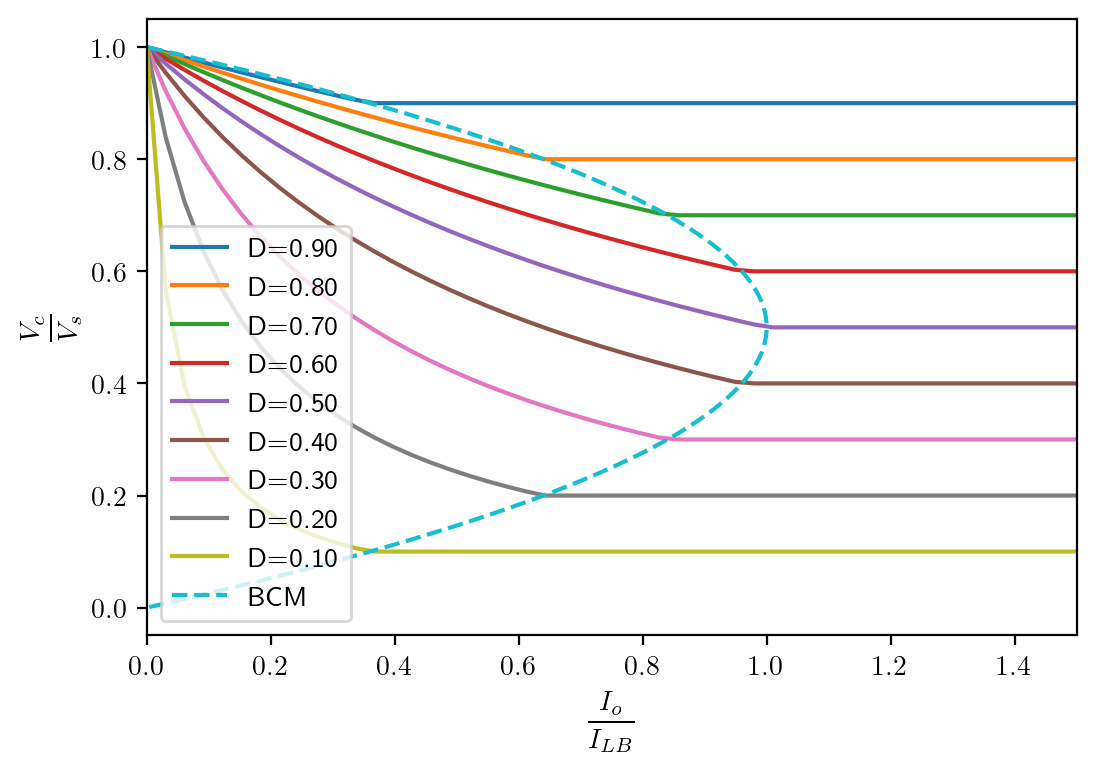

In [3]:
# plot DCM-CCM voltage transfer ratio 
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

D = np.linspace(0.9, 0.1, 9)
ILB = Vin/8/L/fs
Io_to_ILB = np.linspace(0, 1.5, 50)

for duty in D:
    IB = Vin*(duty-duty**2)/2/L/fs
    Io = Io_to_ILB*ILB
    Vc_to_Vs = duty**2/(duty**2+0.25*Io/ILB)
    Vc_to_Vs[np.where(Io>IB)] = duty
    plt.plot(Io_to_ILB, Vc_to_Vs, label='D={:.2f}'.format(duty))

# Then plot the boundary conditon current curve
D = np.linspace(0.001, 1, 100)
IB_array = Vin*(D-D**2)/2/L/fs
IB_referred_array = IB_array/ILB
plt.plot(IB_referred_array, D, '--', label='BCM')
plt.xlabel(r'$\displaystyle\frac{I_o}{I_{LB}}$')
plt.ylabel(r'$\displaystyle\frac{V_c}{V_s}$')
plt.xlim([0,1.5])
plt.legend()

plt.show()

`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec9/Slide22.PNG" align="left" width="62%">

Here let's solve this boundary condition example. Please try to work it out yourself and click below to verify your answer.

```
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


```{admonition} Click here for the solution
:class: tip, dropdown

<img src="./lec9/Slide23.PNG" align="left" width="62%">

```
````
`````

In [4]:
fs = 100.0e3
L  = 45.0e-6
Vin = 35.0
Vo  = 12.0

D = Vo/Vin # duty cycle
Imax = D/fs*(Vin-Vo)/L # max current at boundary condition
IB   = Imax/2 # average current at boundary condition
R    = Vo/IB

print('If R < {:.3f} Ohm, CCM.'.format(R))
print('If R > {:.3f} Ohm, DCM.'.format(R))

If R < 13.696 Ohm, CCM.
If R > 13.696 Ohm, DCM.


## Other basic DC-DC converter topologies




````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec9/Slide24.PNG" align="left" width="62%">

By arranging basic active and passive components in different ways we would be able to construct different power electronics circuits, which are called topologies.
The studied buck converter is one of them.
However, the arrangement of components cannot be arbitrary. We still have to follow certain rules: there should be a freewheeling path for the inductor current when the switch is off, the voltage across the capacitor cannot be changed abruptly.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide25.PNG" align="left" width="62%">

For DC-DC converters, there are two more basic topologies: the boost converter and the buck-boost converter.
In the three different topologies, the inductor waveforms have the same shape.
Therefore, we would be able to analysis them using the same procedure.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide26.PNG" align="left" width="62%">

When the switch is closed, the inductor current will increase, the slope of increase is the voltage across the inductor divided by the inductance $v_L/L$.
When the switch is open, the inductor current decreases since it is freewheeling via the conducting diode, the slope is also $v_L/L$.
Therefore, by applying the principle that the average inductor current at steady state is zero and solving $v_L$ for different states, we will be able to obtain the voltage transfer ratio in CCM.

However, because of different arrangements of components, the capacitor current will differ from the buck converter.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide27.PNG" align="left" width="62%">

So, now let's study the two other topologies by considering how voltage is applied to the inductor, and applying the principle that the average inductor current at steady state is zero.
For buck converter, the voltages across the inductor at on and off state are $V_s - V_c$ and $V_c$ respectively.
In the end we have $V_c = DV_s$.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide28.PNG" align="left" width="62%">

Here it shows the boost topology, which is able to boost the input voltage to a higher level.
Note that now the inductor is moved to the source side, and the switch is between the inductor and the diode.

$$
\begin{align}
v_L &= V_i\quad &\text{on-state}, \\
v_L &= V_i-V_c\quad &\text{off-state}.
\end{align}
$$

So we have 

$$
V_i D T_s + (V_i-V_c) (1-D) T_s =0,
$$

which gives

$$
V_c = \frac{1}{1-D}V_i.
$$

Apparently, since $0<D<1$, the output voltage is equal or higher than the input voltage.
That is why it is called a boost converter.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide29.PNG" align="left" width="62%">

The third topology is a buck-boost converter.
Note that the inductor is now in between, and the diode polarity is reversed.

By studying the two switch states, the inductor voltage is solved as

$$
\begin{align}
v_L &= V_i\quad &\text{on-state}, \\
v_L &= V_c\quad &\text{off-state}.
\end{align}
$$

So we have 

$$
V_i D T_s + V_c (1-D) T_s = 0.
$$

which gives

$$
V_c = -\frac{D}{1-D}V_i.
$$

So the output of the buck-boost converter has a reversed polarity compared to the input voltage.

when $0<D<0.5$, the output voltage is lower than the input voltage in magnitude, and when $0.5<D<1$, the output voltage is higher than the input voltage in magnitude.
That is why it is called a buck-boost converter.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec9/Slide30.PNG" align="left" width="62%">

There are power converter animations available on [this website](https://www.ipes.ethz.ch/mod/lesson/view.php?id=2), which can help you understand the operation of the three basic DC-DC converters.

In the coming two lectures, we will study the other two topologies in detail and build up more complicated topologies based on the basic ones.
```

````